In [ ]:
import pandas as pd
df = pd.read_csv("/content/dataset_7.csv")
df.head()


gbifID                            datasetKey  \
0   891737661  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
1   899947055  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
2  1024190347  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
3  1038323527  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
4  1065596588  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                      occurrenceID   kingdom      phylum  \
0   http://www.inaturalist.org/observations/392232  Animalia    Chordata   
1   http://www.inaturalist.org/observations/566266  Animalia    Cnidaria   
2   http://www.inaturalist.org/observations/784705  Animalia  Arthropoda   
3    http://naturewatch.org.nz/observations/401691  Animalia  Arthropoda   
4  http://www.inaturalist.org/observations/1191781  Animalia    Chordata   

      class          order         family      genus            species  ...  \
0  Mammalia     Hyracoidea    Procaviidae   Procavia  Procavia capensis  ...   
1  Anthozoa   Scleractinia   Plerogyridae  Plerogyra  Plerogyra sinuosa  ...   
2   Insecta    Lepidoptera    Nymphalidae  Cercyonis   Cercyonis pegala  ...   
3   Insecta    Lepidoptera    Nymphalidae    Vanessa       Vanessa itea  ...   
4      Aves  Passeriformes  Passerellidae  Melospiza  Melospiza melodia  ...   

        identifiedBy       dateIdentified       license       rightsHolder  \
0        Tony Rebelo  2017-10-19T23:40:17  CC_BY_NC_4_0       John Francis   
1    Mark Rosenstein  2016-08-09T08:38:55     CC_BY_4_0    Mark Rosenstein   
2        roy pilcher  2014-07-15T00:14:13  CC_BY_NC_4_0        roy pilcher   
3  Melissa Hutchison  2014-05-03T08:32:55  CC_BY_NC_4_0  Melissa Hutchison   
4        roy pilcher  2015-01-24T19:29:13  CC_BY_NC_4_0        roy pilcher   

          recordedBy typeStatus  establishmentMeans           lastInterpreted  \
0       John Francis        NaN                 NaN  2023-09-21T13:29:51.418Z   
1    Mark Rosenstein        NaN                 NaN  2023-09-21T13:29:58.235Z   
2        roy pilcher        NaN                 NaN  2023-09-21T13:30:03.089Z   
3  Melissa Hutchison        NaN                 NaN  2023-09-21T13:30:07.652Z   
4        roy pilcher        NaN                 NaN  2023-09-21T13:30:12.151Z   

               mediaType                                              issue  
0             StillImage  CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...  
1             StillImage  COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  
2             StillImage  CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...  
3                    NaN  COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  
4  StillImage;StillImage  CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...  

[5 rows x 50 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap

In [ ]:
df.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [ ]:
df.isnull().sum()

gbifID                                   0
datasetKey                               0
occurrenceID                             0
kingdom                                  0
phylum                                  12
class                                 1352
order                                 3069
family                                  58
genus                                   98
species                               1237
infraspecificEpithet                 96793
taxonRank                                0
scientificName                           0
verbatimScientificName                   0
verbatimScientificNameAuthorship    100000
countryCode                            332
locality                            100000
stateProvince                          497
occurrenceStatus                         0
individualCount                     100000
publishingOrgKey                         0
decimalLatitude                        238
decimalLongitude                       238
coordinateUncertaintyInMeters        19563
coordinatePrecision                 100000
elevation                           100000
elevationAccuracy                   100000
depth                               100000
depthAccuracy                       100000
eventDate                                0
day                                      0
month                                    0
year                                     0
taxonKey                                 0
speciesKey                            1237
basisOfRecord                            0
institutionCode                          0
collectionCode                           0
catalogNumber                            0
recordNumber                        100000
identifiedBy                           442
dateIdentified                         442
license                                  0
rightsHolder                             0
recordedBy                               0
typeStatus                          100000
establishmentMeans                  100000
lastInterpreted                          0
mediaType                             3605
issue                                    0
dtype: int64

In [ ]:
df.shape

(100000, 50)

In [ ]:
df.drop(columns=['infraspecificEpithet',
    'verbatimScientificNameAuthorship',
    'locality',
    'individualCount',
    'coordinatePrecision',
    'elevation',
    'elevationAccuracy',
    'depth',
    'depthAccuracy',
    'recordNumber',
    'typeStatus',
    'establishmentMeans'],inplace=True)

In [ ]:
df.shape

(100000, 38)

In [ ]:
df.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'taxonRank', 'scientificName',
       'verbatimScientificName', 'countryCode', 'stateProvince',
       'occurrenceStatus', 'publishingOrgKey', 'decimalLatitude',
       'decimalLongitude', 'coordinateUncertaintyInMeters', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'identifiedBy',
       'dateIdentified', 'license', 'rightsHolder', 'recordedBy',
       'lastInterpreted', 'mediaType', 'issue'],
      dtype='object')

In [ ]:
taxonomy_cols = ['phylum', 'class', 'order', 'family', 'genus', 'species']

for col in taxonomy_cols:
    df[col] = df[col].fillna("Unknown")

# Standardize case
for col in taxonomy_cols:
    df[col] = df[col].str.capitalize()

In [ ]:
# Replace missing country/state with 'Unknown'
df['countryCode'] = df['countryCode'].fillna("Unknown")
df['stateProvince'] = df['stateProvince'].fillna("Unknown")

# Remove inconsistent blank strings
df['stateProvince'] = df['stateProvince'].replace("", "Unknown")

In [ ]:
# Drop rows with invalid latitude/longitude values
df = df[
    (df['decimalLatitude'].between(-90, 90, inclusive='both')) &
    (df['decimalLongitude'].between(-180, 180, inclusive='both'))
]

# Remove (0,0) coordinates (common GBIF artifact)
df = df[(df['decimalLatitude'] != 0) & (df['decimalLongitude'] != 0)]

print("Shape after coordinate cleaning:", df.shape)

Shape after coordinate cleaning: (99762, 38)


In [ ]:
df['eventDate'] = pd.to_datetime(df['eventDate'], errors='coerce')

# Extract structured date components
df['event_year'] = df['eventDate'].dt.year
df['event_month'] = df['eventDate'].dt.month
df['event_day'] = df['eventDate'].dt.day
df['event_day_of_week'] = df['eventDate'].dt.day_name()

In [ ]:
def get_season(month):
    if month in [12,1,2]: return "Winter"
    if month in [3,4,5]: return "Spring"
    if month in [6,7,8]: return "Summer"
    if month in [9,10,11]: return "Fall"
    return "Unknown"

df['event_season'] = df['event_month'].apply(get_season)


In [ ]:
df["kingdom"].value_counts()

kingdom
Animalia     58072
Plantae      38816
Fungi         2704
Chromista       99
Protozoa        55
Bacteria        10
Viruses          6
Name: count, dtype: int64

In [ ]:
other_groups = ['Chromista', 'Protozoa', 'Bacteria', 'Viruses']

df['kingdom_grouped'] = df['kingdom']

df.loc[df['kingdom'].isin(other_groups), 'kingdom_grouped'] = 'Other'

print(df['kingdom_grouped'].value_counts())

kingdom_grouped
Animalia    58072
Plantae     38816
Fungi        2704
Other         170
Name: count, dtype: int64


In [ ]:
df.drop_duplicates(subset=['gbifID'], inplace=True)

In [ ]:
df.to_csv("gbif_cleaned.csv", index=False)
print("✔ Cleaned dataset saved as gbif_cleaned.csv")
print("Final shape:", df.shape)

✔ Cleaned dataset saved as gbif_cleaned.csv
Final shape: (99762, 44)


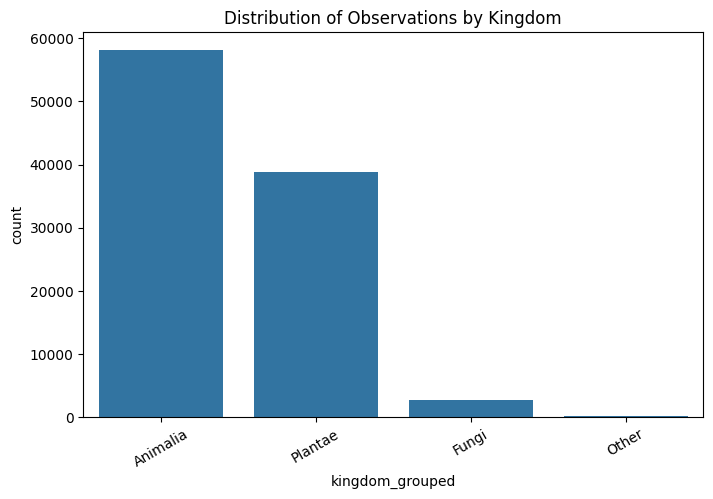

In [ ]:
# =====================================================
# 1. TAXONOMIC DISTRIBUTION ANALYSIS
# =====================================================

# ----- Kingdom distribution -----
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='kingdom_grouped', order=df['kingdom_grouped'].value_counts().index)
plt.title("Distribution of Observations by Kingdom")
plt.xticks(rotation=30)
plt.show()

phylum
Tracheophyta       38382
Chordata           29873
Arthropoda         26104
Basidiomycota       2039
Mollusca            1510
Ascomycota           662
Bryophyta            266
Echinodermata        235
Cnidaria             231
Marchantiophyta      106
Name: count, dtype: int64


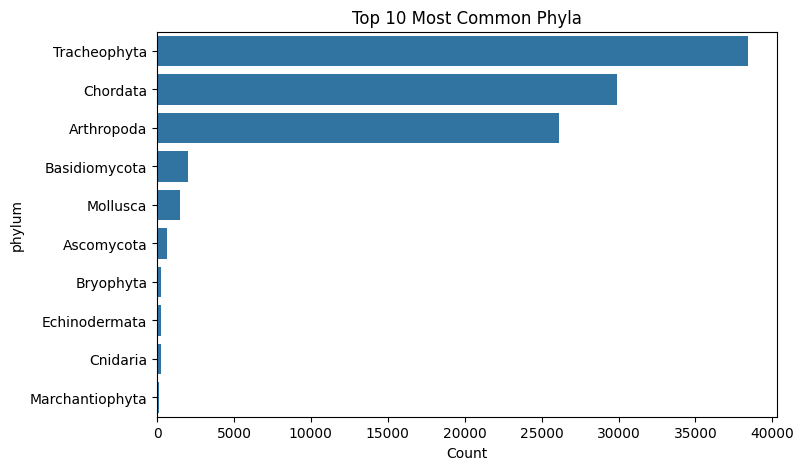

In [ ]:
# ----- Phylum distribution -----
top_phyla = df['phylum'].value_counts().head(10)
print(top_phyla)

plt.figure(figsize=(8,5))
sns.barplot(x=top_phyla.values, y=top_phyla.index)
plt.title("Top 10 Most Common Phyla")
plt.xlabel("Count")
plt.show()

order
Lepidoptera       11262
Passeriformes      9704
Asterales          4991
Lamiales           3497
Coleoptera         3101
Unknown            3035
Hymenoptera        2659
Fabales            2472
Caryophyllales     2331
Odonata            2316
Name: count, dtype: int64


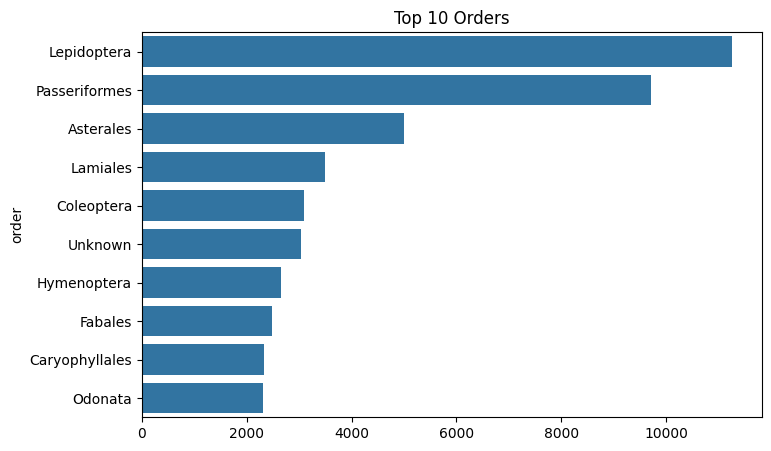

In [ ]:
# ----- Order distribution -----
top_orders = df['order'].value_counts().head(10)
print(top_orders)

plt.figure(figsize=(8,5))
sns.barplot(x=top_orders.values, y=top_orders.index)
plt.title("Top 10 Orders")
plt.show()

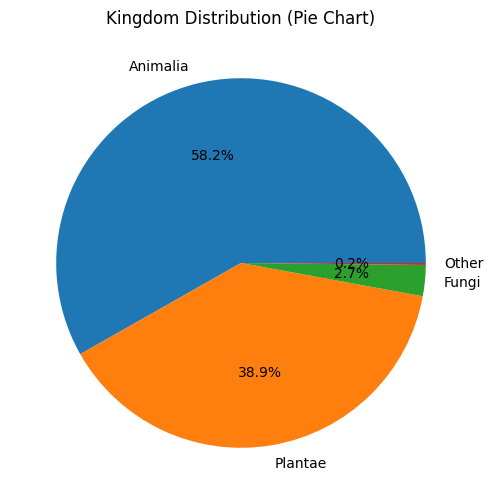

In [ ]:
# ----- Pie chart for kingdoms -----
plt.figure(figsize=(6,6))
df['kingdom_grouped'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Kingdom Distribution (Pie Chart)")
plt.ylabel('')
plt.show()

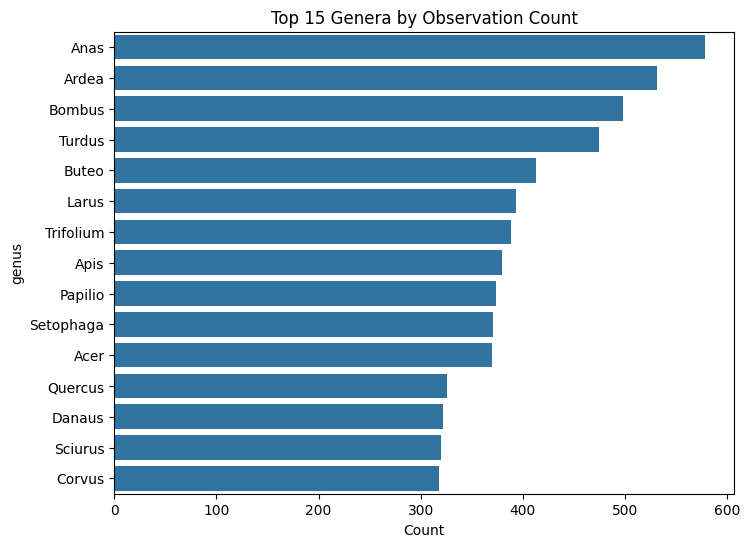

In [ ]:
# =====================================================
# 2. TOP SPECIES / GENERA
# =====================================================

top_genera = df['genus'].value_counts().head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_genera.values, y=top_genera.index)
plt.title("Top 15 Genera by Observation Count")
plt.xlabel("Count")
plt.show()


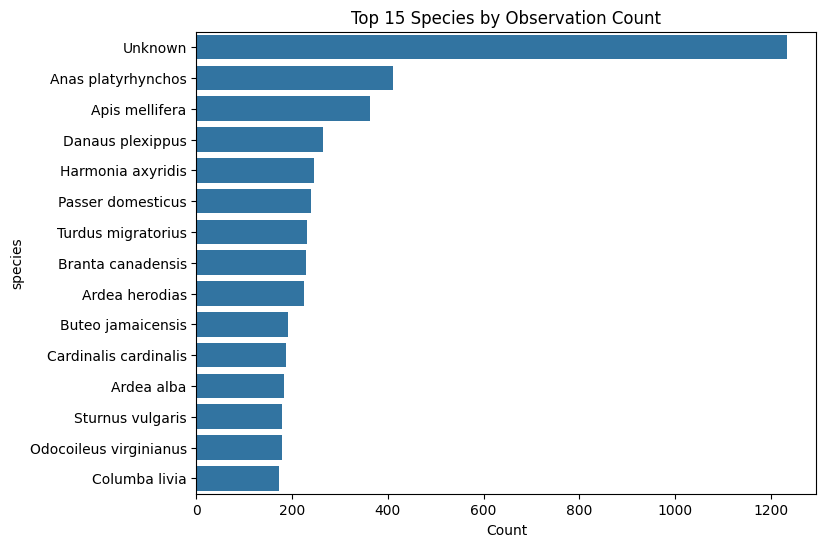

In [ ]:
top_species = df['species'].value_counts().head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_species.values, y=top_species.index)
plt.title("Top 15 Species by Observation Count")
plt.xlabel("Count")
plt.show()

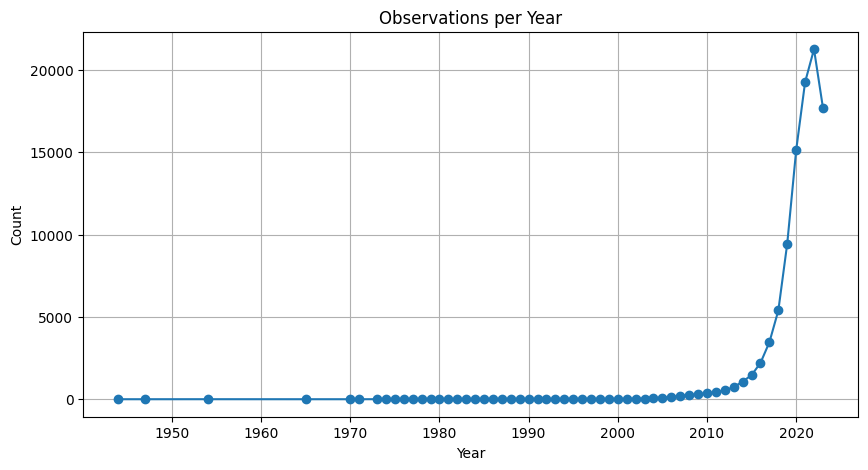

In [ ]:
# =====================================================
# 3. TEMPORAL ANALYSIS – YEARLY & MONTHLY
# =====================================================

# ----- Observations per year -----
yearly_counts = df['event_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title("Observations per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

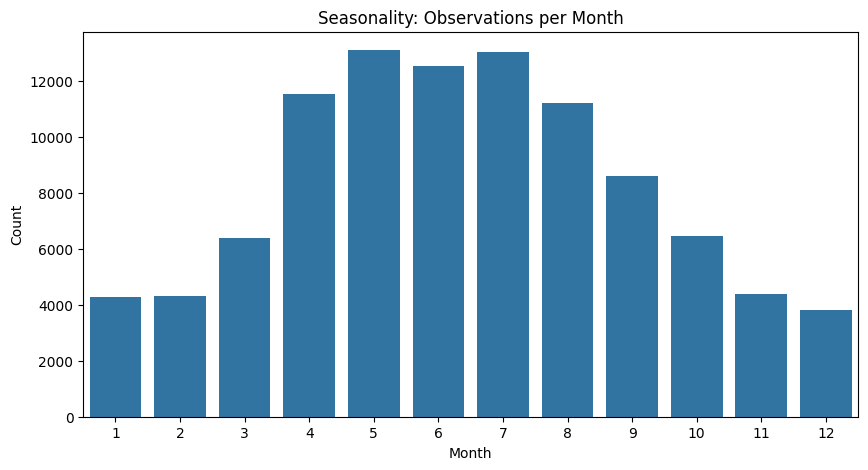

In [ ]:
# ----- Observations per month -----
monthly_counts = df['event_month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Seasonality: Observations per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [ ]:
# =====================================================
# 4. SPATIAL ANALYSIS – MAP & HEATMAP
# =====================================================

# ----- Scatter map using Plotly -----
fig = px.scatter_geo(
    df,
    lat='decimalLatitude',
    lon='decimalLongitude',
    color='kingdom_grouped',
    hover_name='scientificName',
    title='Global Observation Locations'
)
fig.show()

In [ ]:
# ----- Folium interactive heatmap -----
m = folium.Map(location=[df['decimalLatitude'].mean(),
                         df['decimalLongitude'].mean()],
               zoom_start=2)

heat_data = df[['decimalLatitude', 'decimalLongitude']].dropna().values.tolist()

HeatMap(heat_data, radius=5).add_to(m)
m.save("geographical_heatmap.html")
print("✔ Heatmap saved as geographical_heatmap.html")

✔ Heatmap saved as geographical_heatmap.html


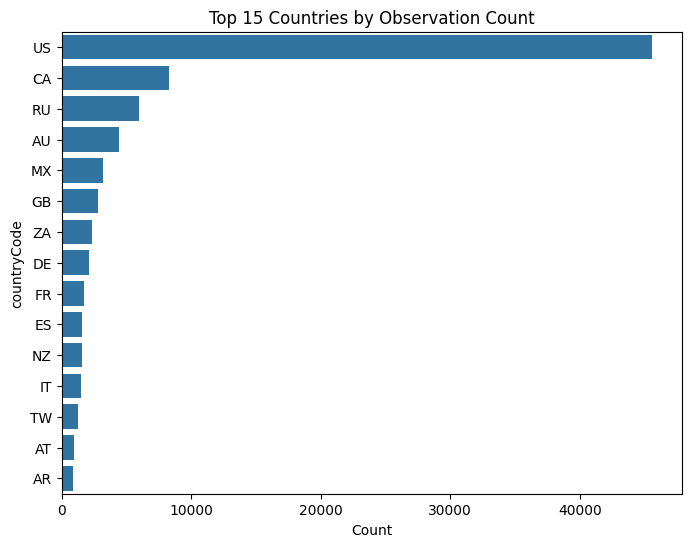

In [ ]:
# =====================================================
# 5. COUNTRY & STATE DISTRIBUTION
# =====================================================

# ----- Country counts -----
top_countries = df['countryCode'].value_counts().head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 15 Countries by Observation Count")
plt.xlabel("Count")
plt.show()

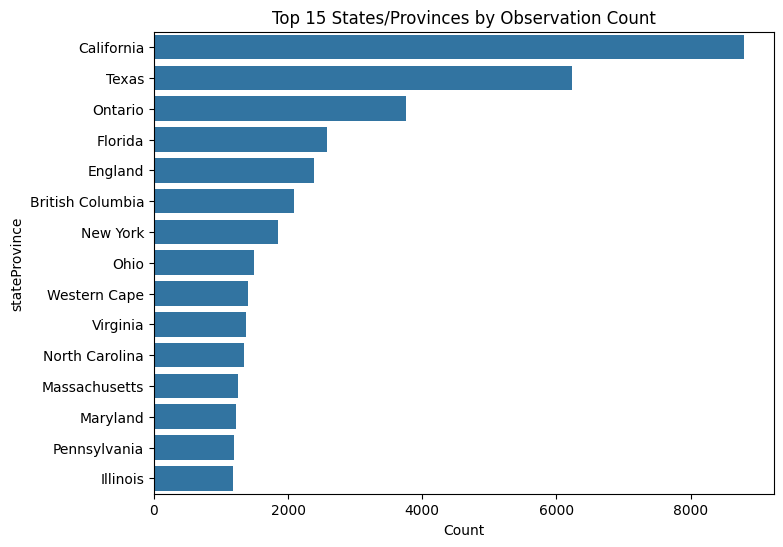

In [ ]:
# ----- State-level counts -----
top_states = df['stateProvince'].value_counts().head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 15 States/Provinces by Observation Count")
plt.xlabel("Count")
plt.show()

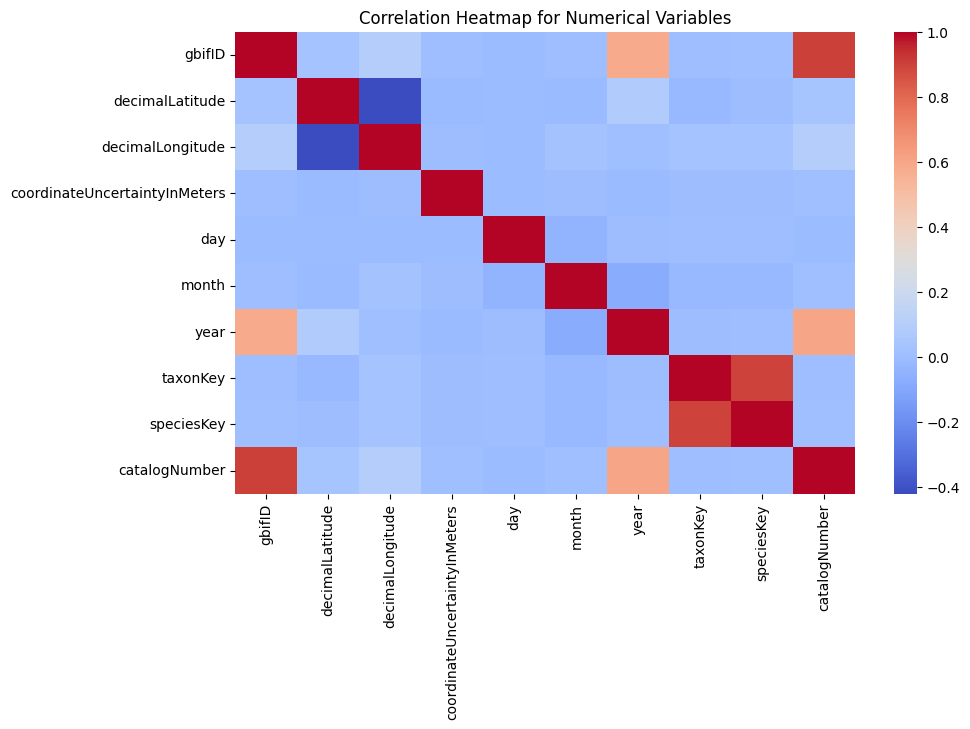

In [ ]:
# =====================================================
# 6. CORRELATION ANALYSIS (NUMERICAL)
# =====================================================

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

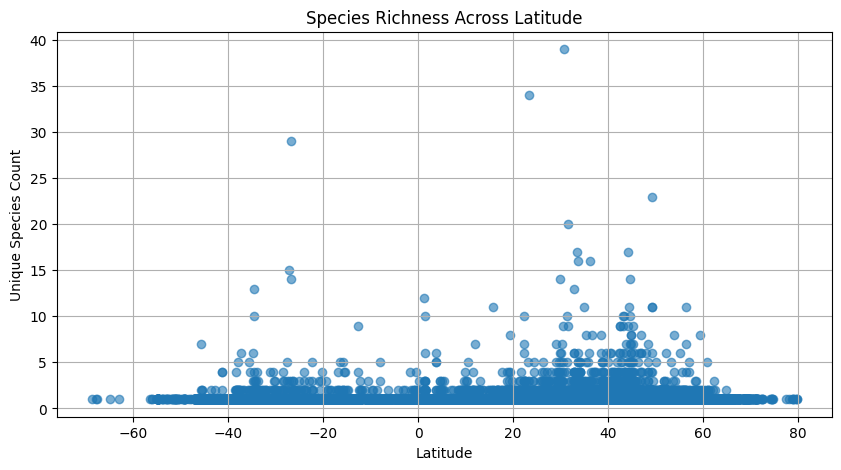

In [ ]:
# =====================================================
# 7. LATITUDE vs BIODIVERSITY RICHNESS
# =====================================================

lat_richness = df.groupby('decimalLatitude')['species'].nunique()

plt.figure(figsize=(10,5))
plt.scatter(lat_richness.index, lat_richness.values, alpha=0.6)
plt.title("Species Richness Across Latitude")
plt.xlabel("Latitude")
plt.ylabel("Unique Species Count")
plt.grid(True)
plt.show()

In [ ]:
print("\n===== Dataset Summary =====")
print(df.describe(include='all'))
print("\nSpecies Count:", df['species'].nunique())
print("Genera Count:", df['genus'].nunique())
print("Families Count:", df['family'].nunique())


===== Dataset Summary =====
              gbifID                            datasetKey  \
count   9.976200e+04                                 99762   
unique           NaN                                     1   
top              NaN  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
freq             NaN                                 99762   
mean    3.312733e+09                                   NaN   
min     8.910184e+08                                   NaN   
25%     2.826215e+09                                   NaN   
50%     3.415378e+09                                   NaN   
75%     3.988538e+09                                   NaN   
max     4.414442e+09                                   NaN   
std     7.885309e+08                                   NaN   

                                             occurrenceID   kingdom  \
count                                               99762     99762   
unique                                              99762         7   
top     https